## Header
Please put your name and student ID number here as usual.

Sai Chandana Vallam Kondu, 023810339


# YOLO V3 Object Detection

## 1. Introduction


As you learned in class, YOLO is a state-of-the-art, real-time object detection algorithm. In this notebook, we will apply the YOLO V3 algorithm to detect objects in images. We have provided a series of images that you can test the YOLO algorithm on and explain why it gave you the results that it did.

The questions in the last section are based on the paper "YOLOv3: An Incremental Improvement,"
Joseph Redmon, Ali Farhadi https://arxiv.org/abs/1804.02767.


There are named images that you can use to test the system. For the problems in the last sections, you will use the images with names that start from VOC to test system performance.

These images are located in the`./images/`folder. We encourage you to test the YOLO algorithm on your own images as well.

## 1.1 Acknowledgements
This code was created by Garima Nishad.

For detailed explanation you can refer to her blog here: https://towardsdatascience.com/you-only-look-once-yolo-implementing-yolo-in-less-than-30-lines-of-python-code-97fb9835bfd2?source=friends_link&sk=5c7234f716e38c8a7b6625ef20fa7811

This was inspired from CVND Udacity course

LinkedIn: https://www.linkedin.com/in/garima-nishad-9b8385134/



# Importing Resources

We will start by loading the required packages into Python. We will be using *OpenCV* to load our images, *matplotlib* to plot them, a`utils` module that contains some helper functions, and a modified version of *Darknet*. YOLO uses *Darknet53*, an open source, deep neural network framework written by the creators of YOLO. The version of *Darknet* used in this notebook has been modified to work in PyTorch 0.4 and has been simplified because we won't be doing any training. Instead, we will be using a set of pre-trained weights that were trained on the Common Objects in Context (COCO) database. For more information on *Darknet*, please visit <a href="https://pjreddie.com/darknet/">Darknet</a>.

In [ ]:
pip install opencv-python

In [2]:
# The following script imports all the modules (.py) to work with the google colab project directory
from google.colab import drive
drive.mount('/content/drive')
folderPath = '/content/drive/MyDrive/Colab Notebooks/EE 526/5 Assignment 5'

import os
import sys

# Define the path to your modules directory
folderPath = '/content/drive/MyDrive/Colab Notebooks/EE 526/5 Assignment 5'

# Add the folderPath to the Python path
sys.path.append(folderPath)

# List the files in the specified directory
file_names = os.listdir(folderPath)

# Filter for Python files with the .py extension
python_files = [file_name for file_name in file_names if file_name.endswith('.py')]

# Iterate through the Python files and import them
for file_name in python_files:
    # Construct the module name (replace spaces with underscores)
    module_name = file_name[:-3].replace(" ", "_")

    # Import the module
    try:
        __import__(module_name)
        module = sys.modules[module_name]
        print(f'{module_name} imported successfully')
    except ImportError as e:
        print(f'Error importing {module_name}: {e}')

# Add the folderPath to the Python path
# sys.path.append(folderPath)
# from utils import boxes_iou

# print(detect_objects)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
darknet imported successfully
utils imported successfully


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# from utils import *
# from darknet import Darknet

# Setting Up The Neural Network

We will be using the latest version of YOLO, known as YOLOv3. We have already downloaded the `yolov3.cfg` file that contains the network architecture used by YOLOv3 and placed it in the `/cfg/` folder. Similarly, we have placed the `yolov3.weights` file that contains the pre-trained weights in the `/weights/` directory. Finally, the `/data/` directory, contains the `coco.names` file that has the list of the 80 object classes that the weights were trained to detect.

In the code below, we start by specifying the location of the files that contain the neural network architecture, the pre-trained weights, and the object classes.  We then use *Darknet* to setup the neural network using the network architecture specified in the `cfg_file`. We then use the`.load_weights()` method to load our set of pre-trained weights into the model. Finally, we use the `load_class_names()` function, from the `utils` module, to load the 80 object classes.

In [ ]:
# Set the location and name of the cfg file
# cfg_file = './cfg/yolov3.cfg'
cfg_file = f'{folderPath}/cfg/yolov3.cfg'

# # Set the location and name of the pre-trained weights file
# weight_file = './weights/yolov3.weights'
weight_file = f'{folderPath}/weights/yolov3.weights'

# # Set the location and name of the COCO object classes file
# namesfile = 'data/coco.names'
namesfile = f'{folderPath}/data/coco.names'

# Load the network architecture
m = Darknet(cfg_file)

# Load the pre-trained weights
m.load_weights(weight_file)

# # Load the COCO object classes
class_names = load_class_names(namesfile)
print(f'Total Classes: {len(class_names)}')
print(f'class_names: ', class_names )


Total Classes: 80
class_names:  ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# The Darknet Backbone for object detection

Now that the neural network has been setup, we can see what it looks like. We can print the network using the `.print_network()` function.

In [ ]:
# Print the neural network used in YOLOv3
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

As we can see, the neural network used by YOLOv3 consists mainly of convolutional layers, with some shortcut connections and upsample layers. For a full description of this network please refer to the <a href="https://pjreddie.com/media/files/papers/YOLOv3.pdf">YOLOv3 Paper</a>.

# Loading and Resizing Our Images

In the code below, we load our images using OpenCV's `cv2.imread()` function. Since, this function loads images as BGR we will convert our images to RGB so we can display them with the correct colors.

As we can see in the previous cell, the input size of the first layer of the network is 416 x 416 x 3. Since images have different sizes, we have to resize our images to be compatible with the input size of the first layer in the network. In the code below, we resize our images using OpenCV's `cv2.resize()` function. We then plot the original and resized images.

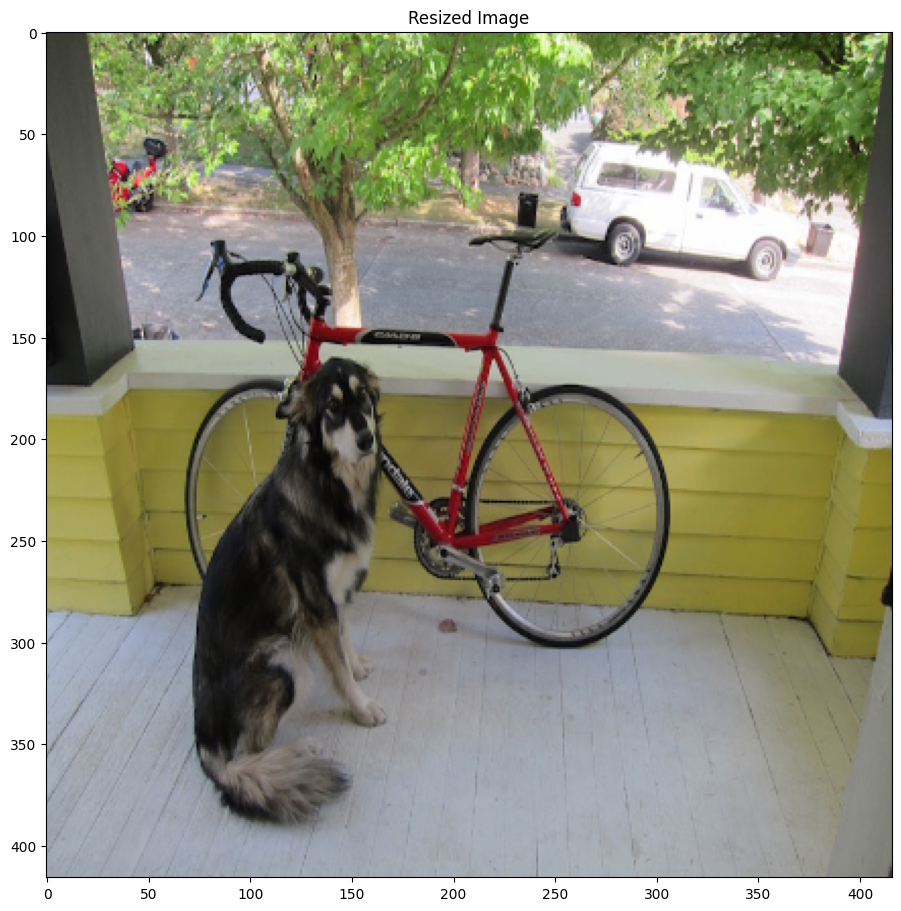

In [ ]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
# img = cv2.imread('./images/dog.jpg')
img = cv2.imread(f'{folderPath}/images/dog.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.
resized_image = cv2.resize(original_image, (m.width, m.height))

# Display the images
plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
# plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()

# Setting the Non-Maximal Suppression Threshold

As you learned in the previous lessons, YOLO uses **Non-Maximal Suppression (NMS)** to only keep the best bounding box. The first step in NMS is to remove all the predicted bounding boxes that have a detection probability that is less than a given NMS threshold.  In the code below, we set this NMS threshold to `0.6`. This means that all predicted bounding boxes that have a detection probability less than 0.6 will be removed.

In [ ]:
# Set the NMS threshold
nms_thresh = 0.6

# Setting the Intersection Over Union Threshold

After removing all the predicted bounding boxes that have a low detection probability, the second step in NMS, is to select the bounding boxes with the highest detection probability and eliminate all the bounding boxes whose **Intersection Over Union (IOU)** value is higher than a given IOU threshold. In the code below, we set this IOU threshold to `0.4`. This means that all predicted bounding boxes that have an IOU value greater than 0.4 with respect to the best bounding boxes will be removed.

In the `utils` module you will find the `nms` function, that performs the second step of Non-Maximal Suppression, and the `boxes_iou` function that calculates the Intersection over Union of two given bounding boxes. You are encouraged to look at these functions to see how they work.

In [ ]:
# Set the IOU threshold
iou_thresh = 0.4

# Object Detection

Once the image has been loaded and resized, and you have chosen your parameters for `nms_thresh` and `iou_thresh`, we can use the YOLO algorithm to detect objects in the image. We detect the objects using the `detect_objects(m, resized_image, iou_thresh, nms_thresh)`function from the `utils` module. This function takes in the model `m` returned by *Darknet*, the resized image, and the NMS and IOU thresholds, and returns the bounding boxes of the objects found.

Each bounding box contains 7 parameters: the coordinates *(x, y)* of the center of the bounding box, the width *w* and height *h* of the bounding box, the confidence detection level, the object class probability, and the object class id. The `detect_objects()` function also prints out the time it took for the YOLO algorithm to detect the objects in the image and the number of objects detected. Since we are running the algorithm on a CPU it takes about 2 seconds to detect the objects in an image, however, if we were to use a GPU it would run much faster.

Once we have the bounding boxes of the objects found by YOLO, we can print the class of the objects found and their corresponding object class probability. To do this we use the `print_objects()` function in the `utils` module.

Finally, we use the `plot_boxes()` function to plot the bounding boxes and corresponding object class labels found by YOLO in our image. If you set the `plot_labels` flag to `False` you will display the bounding boxes with no labels. This makes it easier to view the bounding boxes if your `nms_thresh` is too low. The `plot_boxes()`function uses the same color to plot the bounding boxes of the same object class. However, if you want all bounding boxes to be the same color, you can use the `color` keyword to set the desired color. For example, if you want all the bounding boxes to be red you can use:

`plot_boxes(original_image, boxes, class_names, plot_labels = True, color = (1,0,0))`

You are encouraged to change the `iou_thresh` and `nms_thresh` parameters to see how they affect the YOLO detection algorithm. The default values of `iou_thresh = 0.4` and `nms_thresh = 0.6` work well to detect objects in different kinds of images. In the cell below, we have repeated some of the code used before in order to prevent you from scrolling up down when you want to change the `iou_thresh` and `nms_thresh`parameters or the image. Have Fun!

### 2.1 What Network Sees

The code in this section shows all the boxes found by the system when the thresholds are set to zero. This means that there is no filtering of the "objectness" probability. Note the number of boxes found and plotted and the number of nonsensical results. The confidence level given in the output is the confidence found by the object recognition system, NOT the "objectness" probability. The objectness probability is found in the fifth element of the bounding box vector shown below it.

In [ ]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
# img = cv2.imread('./images/dog.jpg')
img = cv2.imread(f'{folderPath}/images/dog.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.
resized_image = cv2.resize(original_image, (m.width, m.height))

# Set the IOU threshold. Default value is 0.4
iou_thresh = 0.2

# Set the NMS threshold. Default value is 0.6
nms_thresh = 0.0

# Detect objects in the image
print(detect_objects)
boxes_all = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Print the objects found and the confidence level and box information
for i in range(len(boxes_all)):
        box = boxes_all[i]

        if len(box) >= 7 and class_names:
            obj_conf = box[5]
            obj_coord = [box[1],box[2],box[3],box[4]]
            cls_conf = box[5]
            cls_id = box[6]

            print('%i. %s %f ' % (i + 1, class_names[cls_id], cls_conf))
            print(box)


#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes_all, class_names, plot_labels = True)





Output hidden; open in https://colab.research.google.com to view.

### 2.2 Effects of NMS and IoU Processing
This is the code that you will use to answer the questions in Section 3. You will need to experiment with differnt images, either from VOC or your own images to investigate the effects of the different thresholds.

In [ ]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
# img = cv2.imread('./images/dog.jpg')
img = cv2.imread(f'{folderPath}/images/dog.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.
resized_image = cv2.resize(original_image, (m.width, m.height))

# Set the IOU threshold. Default value is 0.4
iou_thresh = 0.4

# Set the NMS threshold. Default value is 0.6
nms_thresh = 0.6


# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Print the objects found and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)

Output hidden; open in https://colab.research.google.com to view.

## 3.0 Homework Assignment

Before answering any questions, please be sure that you have read at least the YOLO V3 paper. The list of foundational YOLO papers is given below:
- You Only Look Once: Unified, Real-Time Object Detection, 2015.<a href="https://pjreddie.com/media/files/papers/yolo_1.pdf">YOLO Paper</a>
- YOLO9000: Better, Faster, Stronger, 2016.<a href="https://pjreddie.com/media/files/papers/YOLO9000.pdf">YOLO9000 Paper</a>
- YOLOv3: An Incremental Improvement, 2018.<a href="https://pjreddie.com/media/files/papers/YOLOv3.pdf">YOLOv3 Paper</a>


### Questions
1. YOLO V3 Questions
a. What is the output grid size for this model of YOLO?
b. How many bounding boxes prototypes are allowed for each grid-based anchor box?

**Answer (a):**

>> From yolov3.cfg,
*   input image dimensions: 416x416
*   anchors = 10,13,  16,30,  33,23,  30,61,  62,45,  59,119,  116,90,  156,198,  373,326

>>
* [yolo] mask = 6,7,8 (First Detection Scale):
>> * The network architecture has downsampled the image by a factor of 32
>> * The output grid size is 416/32 x 416/32, which results in **13x13**.
>> * The lowest resolution grid (13x13) uses bigger anchor boxes -- anchors = 116,90,  156,198,  373,326
* [yolo] mask = 3,4,5 (Second Detection Scale):
>> * This layer upsamples the grid by a factor of 2. Since the first detection scale had a grid size of 13x13, the second detection scale's output grid size becomes **26x26** (13x2).
>> * The medium resolution grid (26x26) uses middle anchor boxes -- anchors = 30,61,  62,45,  59,119
* [yolo] mask = 0,1,2 (Third Detection Scale):
>> * Like the second detection scale, this layer also upsamples the grid by a factor of 2. Since the second detection scale had a grid size of 26x26, the third detection scale's output grid size becomes **52x52** (26x2).
>> * The higheset resolution grid (52x52) uses smaller anchor boxes -- anchors = 10,13,  16,30,  33,23

>> In summary, the output grid size for YOLOv3 depends on the detection scale, and there are three scales: 13x13 (small), 26x26 (medium), and 52x52 (large).

>> References beyond learning from papers:
>> 1. YOLOv3 from Scratch: https://www.youtube.com/watch?v=Grir6TZbc1M&ab_channel=AladdinPersson
>> 2.   https://stats.stackexchange.com/questions/507090/what-are-grids-and-detection-at-different-scales-in-yolov3


**Answer (b):**
> *  The number of bounding box prototypes allowed for each grid-based anchor box is determined by the num parameter in the [yolo] section of the YOLO configuration file.

> *  From the yolov3.cfg, we can observe that
```
[yolo]
mask = 6,7,8
anchors = 10,13,  16,30,  33,23,  30,61,  62,45,  59,119,  116,90,  156,198,  373,326
classes=80
num=9
jitter=.3
ignore_thresh = .5
truth_thresh = 1
random=1
...
[yolo]
mask = 3,4,5
anchors = 10,13,  16,30,  33,23,  30,61,  62,45,  59,119,  116,90,  156,198,  373,326
classes=80
num=9
jitter=.3
ignore_thresh = .5
truth_thresh = 1
random=1
...
[yolo]
mask = 0,1,2
anchors = 10,13,  16,30,  33,23,  30,61,  62,45,  59,119,  116,90,  156,198,  373,326
classes=80
num=9
jitter=.3
ignore_thresh = .5
truth_thresh = 1
random=1
```
>* Each [yolo] section with *num=9* means that 9 bounding box prototypes can be predicted for each grid cell at each scale.


2. NMS Threshold
a. Describe how the NMS algorithm works in your own words. Use an example from the images provided to illustrate your work.
b. What happens when the P(Objectness) (NMS Threshold) is set to zero?

**Answer (a):**
> * YOLO employs a technique called Non-Maximal Suppression (NMS) to retain only the most accurate bounding boxes. Here's how it works: Initially, it filters out all predicted bounding boxes with a detection probability below a certain threshold. In the above code snippet 2.2, we've set a threshold *nms_thresh = 0.6*. It implies that any predicted bounding boxes with a detection probability lower than 0.6 get discarded.
> * Example: I have considered the dog.jpg in the below code snippet and set *nms_thresholds = [0.1, 0.3, 0.5, 0.7]* and observed the output as follows:
>> * When using an NMS threshold of 0.1, it took 1.448 seconds to detect 4 objects in the image, including a dog, a truck, a bicycle, and a TV monitor. By visual inspection, it is not a TV monitor and it is a wall. So, while NMS threshold reaches to 0 there is a risk of false positives in the output as it doesn't remove the lower confidence rate ones.
>> * With an NMS threshold of 0.3, the detection time increased to 1.661 seconds, but only 3 objects were detected (dog, truck, and bicycle). The TV monitor was not detected due to the higher NMS threshold.
>> * Setting the NMS threshold to 0.5, it took 2.316 seconds to detect 3 objects (dog, truck, and bicycle). The TV monitor was still not detected because the threshold is higher.
>> * Lastly, with an NMS threshold of 0.7, it took 1.675 seconds to detect the same 3 objects (dog, truck, and bicycle). The TV monitor remained undetected due to the higher NMS threshold.
> * These results demonstrate that the NMS threshold affects both the number of objects detected and the processing time, allowing to fine-tune the trade-off between precision and speed in object detection.

**Answer (b):**
> * When the P(Objectness (NMS Threshold) is set to zero, no predicted bounding boxes will be removed during the NMS process, regardless of their detection confidence scores. It means, all predicted bounding boxes, even those with very low confidence scores, will be retained in the final list of bounding boxes, as in the above code snippet 2.1, we set a threshold *nms_thresh = 0* for the dog.jpg and observed all the bounding boxes. In summary, it disable NMS and leads to more bounding boxes in the output, including many false positives, as it doesn't enforce a threshold for objectness confidence.


**References:**
>> * https://medium.com/analytics-vidhya/you-only-look-once-yolo-implementing-yolo-in-less-than-30-lines-of-python-code-97fb9835bfd2



In [ ]:
## Code snippet for Q2 answer

# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
img = cv2.imread(f'{folderPath}/images/dog.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.
resized_image = cv2.resize(original_image, (m.width, m.height))

# Set the IOU threshold. Default value is 0.4
iou_thresh = 0.2

# Set multiple NMS thresholds
nms_thresholds = [0.1, 0.3, 0.5, 0.7]

for nms_thresh in nms_thresholds:
    # Detect objects in the image
    boxes_all = detect_objects(m, resized_image, iou_thresh, nms_thresh)
    print('-'*80)
    print(f'NMS Threshold: {nms_thresh}')
    print('Number of boxes detected:', len(boxes_all))
    print('-'*80)
    # Print the objects found and their confidence levels and box information
    for i, box in enumerate(boxes_all):
        if len(box) >= 7 and class_names:
            obj_conf = box[5]
            obj_coord = [box[1], box[2], box[3], box[4]]
            cls_conf = box[5]
            cls_id = box[6]

            print(f'{i + 1}. {class_names[cls_id]} {cls_conf}')
            print(box)

    # Plot the image with bounding boxes and corresponding object class labels
    plot_boxes(original_image, boxes_all, class_names, plot_labels=True)


Output hidden; open in https://colab.research.google.com to view.

3. IoU Threshold
a. Describe how the IoU threshold works to remove overlapping boxes in an image?
b. Using the images provided, show how changing the threshold adds and removes boxes.

**Answer (a):**
> * After removing all predicted bounding boxes with low detection probabilities, the second step in NMS is the application of an Intersection Over Union (IoU) threshold. In this step, the algorithm selects the bounding boxes with the highest detection probabilities and eliminates any bounding boxes with an IoU value greater than a specified threshold. For instance, let's consider the IoU threshold is set at 0.4. It signifies that any predicted bounding boxes with an IoU value exceeding 0.4 concerning the best bounding boxes will be removed. The IoU threshold ensures that only the most accurate and non-overlapping bounding boxes are retained, helping to improve the precision of object detection in the image

**Answer (b):**
> * The actual image (dog.jpg) by inspection has only three objects: a dog, a truck, and a bicycle objects. The below code snippet is set as *iou_thresholds = [0.1, 0.3, 0.5, 0.7]* and *nms_thresholds = [0.1, 0.3, 0.5, 0.7]*. The result is summarized and includes comments for each scenario as False Positives (FP) and False Negatives (FN). It detected a "wall" as a "tvmonitor," which is an FP, and it didn't detect the "bicycle," resulting in an FN. It is important to note that no scenario has detected a motorcycle presented at the top left of the image.
> * When changing the IoU threshold:
>> * Increasing the IoU threshold results in fewer boxes detected, which can cause false negatives.
>> * Decreasing the IoU threshold leads to more boxes being detected, potentially resulting in false positives.
>> * The NMS threshold also affects the number of boxes; when lowered, more boxes are kept.
> * It's important to strike a balance between IoU and NMS thresholds to achieve the desired trade-off between FPs and FNs, depending on the specific requirements of the object detection task.

| NMS Threshold | IoU Threshold | Objects Detected | Time (s) | Comment |
|---------------|---------------|-------------------|---------|---------|
| 0.1           | 0.1           | 3 (dog, truck, tvmonitor) | 3.314   | **FN:** bicycle; **FP:** tvmonitor |
| 0.1           | 0.3           | 4 (dog, truck, bicycle, tvmonitor) | 2.332   |  **FP:** tvmonitor  |
| 0.1           | 0.5           | 4 (dog, truck, bicycle, tvmonitor) | 2.383   |  **FP:** tvmonitor  |
| 0.1           | 0.7           | 5 (dog, truck, bicycle, bicycle, tvmonitor) | 2.327   |  **Note:** bicycle detected twice; **FP:** tvmonitor  |
| 0.3           | 0.1           | 2 (dog, truck) | 1.625   |  **FN:** bicycle;   |
| 0.3           | 0.3           | 3 (dog, truck, bicycle) | 1.708   |  **Detected correctly** |
| 0.3           | 0.5           | 3 (dog, truck, bicycle) | 1.754   |  **Detected correctly**  |
| 0.3           | 0.7           | 3 (dog, truck, bicycle) | 1.767   |  **Detected correctly**  |
| 0.5           | 0.1           | 2 (dog, truck) | 1.684   |  **FN:** bicycle |
| 0.5           | 0.3           | 3 (dog, truck, bicycle) | 1.846   |  **Detected correctly** |
| 0.5           | 0.5           | 3 (dog, truck, bicycle) | 1.778   | **Detected correctly**  |
| 0.5           | 0.7           | 3 (dog, truck, bicycle) | 1.796   |  **Detected correctly** |
| 0.7           | 0.1           | 2 (dog, truck) | 1.649   |  **FN:** bicycle |
| 0.7           | 0.3           | 3 (dog, truck, bicycle) | 2.281   |  **Detected correctly**  |
| 0.7           | 0.5           | 3 (dog, truck, bicycle) | 1.820   |  **Detected correctly**  |
| 0.7           | 0.7           | 3 (dog, truck, bicycle) | 1.796   | **Detected correctly** |

In [ ]:
## Code snippet for Q3 answer

# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
img = cv2.imread(f'{folderPath}/images/dog.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.
resized_image = cv2.resize(original_image, (m.width, m.height))

# Set multiple IoU thresholds
iou_thresholds = [0.1, 0.3, 0.5, 0.7]

# Set multiple NMS thresholds
nms_thresholds = [0.1, 0.3, 0.5, 0.7]

for iou_thresh in iou_thresholds:
    for nms_thresh in nms_thresholds:
        # Detect objects in the image
        boxes_all = detect_objects(m, resized_image, iou_thresh, nms_thresh)
        print('-' * 80)
        print(f'IoU Threshold: {iou_thresh}, NMS Threshold: {nms_thresh}')
        print('Number of boxes detected:', len(boxes_all))
        print('-' * 80)
        # Print the objects found and their confidence levels and box information
        for i, box in enumerate(boxes_all):
            if len(box) >= 7 and class_names:
                obj_conf = box[5]
                obj_coord = [box[1], box[2], box[3], box[4]]
                cls_conf = box[5]
                cls_id = box[6]

                print(f'{i + 1}. {class_names[cls_id]} {cls_conf}')
                print(box)

        # Plot the image with bounding boxes and corresponding object class labels
        plot_boxes(original_image, boxes_all, class_names, plot_labels=True)


Output hidden; open in https://colab.research.google.com to view.


4. Several images are provided in the image folder from the VOC data set. These images have some challenges such as object overlap and small objects. Run each image throught the YOLO system with the same set of NMS and IoU thresholds and describe your results in terms of
a. Were the key objects found?
b. What was missed?
c. If there were multiples of the same object, were they all found correctly with appropriate bounding boxes?
d. Figure out how you can improve the system performance by changing the post-processing of the images.

**Answer:**
>* I have considered *iou_thresh = 0.4* and *nms_thresh = 0.6*. The below code snippets runs all the VOC data set through yolov3 system. I summarized the result in the below table. I have included "Objects by Visual Inspection" by inspecting each image manually, which may have false alarms.

| Image Name    | Number of Objects Detected | Detected Objects            | Objects by Visual Inspection  | Comment                                                  |
|---------------|-----------------------------|-----------------------------|------------------------------|----------------------------------------------------------|
| VOC9955.jpg   | 1                           | Boat: 0.9718                | There are multiple bots with lights on it behind the detected one. | Object correctly identified but missed other boats                               |
| VOC9949.jpg   | 2                           | Person: 0.9575, Person: 1.0 | There are three persons and only two detected | Objects correctly identified but boundaries are not exact and missed detecting one person. |
| VOC9945.jpg   | 9                           | Sheep (x9)                  | Based on inspection, it has many sheepts (couldn't count though)| Objects correctly identified, but missed a few sheeps |
| VOC9946.jpg   | 4                           | Train: 0.9999, Person (x3)  | Train, Person (x3), and there are more person but not detected | Objects correctly identified, but missed a few persons. |
| VOC9940.jpg   | 2                           | Bird (x2)                   | Bird (x2)                   | Objects correctly identified                              |
| VOC78.jpg     | 2                           | Dog: 0.9999, Dog: 0.4525     | Dog, Dog. But the boundary of a dog in not completed identified  | Detected one dog with a lower confidence level. And, it missed the complete boundary of a dog.             |
| VOC9958.jpg   | 3                           | Person: 1.0, Bicycle: 1.0, Person: 1.0 | Person, Bicycle, Person. But, it didn't detect a person with a baby | Objects correctly identified. But, missed persons and other objects.
| VOC77.jpg     | 1                           | Cat: 0.9966                 | Cat. Missed another cat. And boundary extended for the detected cat                       | Object correctly identified, but missed a cat                               |
| VOC9954.jpg   | 2                           | Horse: 1.0, Person: 1.0     | Horse, Person               | Objects correctly identified                              |

> * (a) Were the key objects found?
>> * In general, the key objects were found in most images, but there were variations in detection accuracy. Key objects included boats, persons, sheep, trains, birds, dogs, bicycles, cats, and horses. The accuracy varied depending on the object type and image.

> * b. What was missed?
Several objects were missed or not fully detected. For example:
>> * In "VOC9955.jpg," only one boat was detected, missing the other boats behind it.
>> * In "VOC9949.jpg," three persons were visually observed, but only two were detected.
>> * In "VOC9945.jpg," multiple sheep were observed, but not all were detected.
>> * In "VOC9946.jpg," additional persons and a train were not detected.
>> * In "VOC78.jpg," part of a dog was missed, and another dog had a lower confidence level.
>> * In "VOC9958.jpg," a person with a baby was not detected.
>> * In "VOC77.jpg," an additional cat was missed.

> * c. If there were multiples of the same object, were they all found correctly with appropriate bounding boxes?
>> * In some cases, multiple instances of the same object were detected with appropriate bounding boxes, such as multiple sheep in "VOC9945.jpg," multiple birds in "VOC9940.jpg," and multiple dogs in "VOC78.jpg."
However, not all instances were detected correctly in other cases, as mentioned in part (b).

> * d. Figure out how you can improve the system performance by changing the post-processing of the images.
>>* To improve system performance, several strategies can be considered:
>>> * **Refining the NMS and IoU thresholds:** Adjusting NMS and IoU thresholds can impact the number of bounding boxes and their quality.
>>> * **Adjusting the confidence threshold:** Changing the confidence threshold may help filter out false positives and improve object detection accuracy.
>>> * **Enhancing object boundary detection:** Improving the model's ability to precisely detect object boundaries can help detect objects more accurately.
>>> * **Experimenting with different pre-trained models:** Trying different YOLO or pre-trained weights might yield better results for specific object categories.





In [ ]:
## Code snippet for Q4 answer

import cv2
import matplotlib.pyplot as plt
import os

# Load the YOLO model and class names
# Replace 'm' and 'class_names' with your YOLO model and class names setup

# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Set the IOU and NMS thresholds
iou_thresh = 0.4
nms_thresh = 0.6

# List all VOC image files in the folder
image_files = [f for f in os.listdir(os.path.join(folderPath, 'images')) if f.startswith('VOC') and f.endswith('.jpg')]
print(image_files)

# Loop through the images
for image_file in image_files:
    print('-'*80)
    print(image_file)
    print('-'*80)
    # Load the image
    img = cv2.imread(os.path.join(folderPath, 'images', image_file))
    original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to match YOLO input size
    resized_image = cv2.resize(original_image, (m.width, m.height))

    # Detect objects in the image
    boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

    # # Load class names (ensure class_names is defined properly)
    # class_names = load_class_names("coco.names")

    # Print the objects found and the confidence level
    print_objects(boxes, class_names)

    # Plot the image with bounding boxes and corresponding object class labels
    plot_boxes(original_image, boxes, class_names, plot_labels=True)

    # Display the results for this image
    plt.show()


Output hidden; open in https://colab.research.google.com to view.